# Check Tag Integrity

In [1]:
import os
import re
path = r'D:\Documents (HD)\Obsidian Vaults\Science & Math'
files = os.listdir(path)
tagset = set()
for file in files:
    if file.endswith('.md'):
        with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
            text = f.read()
    else:
        continue
    
    tag_flag = False
    for line in text.split('\n'):
        if re.findall('Tags', line):
            tagline = set([line])
            tagset = tagset.union(tagline)
            if line == '###### Tags':
                tag_flag = True
                continue

            else:
                print(file)
                break

        if tag_flag:
            if re.findall('#', line):
                continue

            else:
                print(file)

# Inspect Tags

In [2]:
import os
import re
path = r'D:\Documents (HD)\Obsidian Vaults\Science & Math'
files = os.listdir(path)
tagset = set()
for file in files:
    if file.endswith('.md'):
        with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
            text = f.read()
    else:
        continue
    tag_flag = False
    for line in text.split('\n'):
        if line == '###### Tags':
            tag_flag = True
            continue
        if tag_flag:
            tags = re.findall(r'#([^ ]+)', line)
            if tags:
                tagset = tagset.union(set(tags))
tagset = sorted(list(tagset))
for tag in tagset:
    print(tag)


AbstractAlgebra
AlgebraicCalculus
AlgebraicGeometry
AlgebraicTopology
AlgorithmicDifferentiation
Algorithms
AlphaFold
Analysis
ApproximationTheory
ArtificialIntelligence
AsymptoticAnalysis
AttentionMechanism
AutomaticDifferentiation
BasicProbability
BayesianStatistics
Biochemistry
Bioinformatics
Biophysics
Biotechnology
BoundaryValueProblems
C
Calculus
CalculusOfVariations
CategoryTheory
Chemistry
ClassicalMechanics
CliffordAlgebra
Clustering
Combinatorics
CommutativeAlgebra
ComplexAnalysis
ComplexNetworks
ComputationalBiology
ComputationalChemistry
ComputationalGeometry
ComputationalGraphs
ComputationalTopology
ComputerAlgebra
ComputerGraphics
ComputerScience
ComputerVision
ConformalCosmology
ConvexAnalysis
ConvolutionalNeuralNetworks
Cosmology
Cpp
CàdlàgFunctions
DataStructure
DeepLearning
DenoisingDiffusionProbabilisticModels
DensityFunctionalTheory
DescriptiveSetTheory
DifferentialEquations
DifferentialForms
DifferentialGeometry
Diffusion
DigitalSignalProcessing
DimensionalityReduc

# Calculate Tag Relevance

In [51]:
import os
import re
import numpy as np
path = r'D:\Documents (HD)\Obsidian Vaults\Science & Math'
files = os.listdir(path)
tagmultiset = dict()
for file in files:
    if file.endswith('.md'):
        with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
            text = f.read()
    else:
        continue
    tag_flag = False
    for line in text.split('\n'):
        if line == '###### Tags':
            tag_flag = True
            continue
        if tag_flag:
            tags = re.findall(r'#([^ ]+)', line)
            if tags:
                for tag in tags:
                    tagmultiset[tag] = tagmultiset.get(tag, 0)*1.2 + np.log(len(text))

tagmultiset = dict(sorted(tagmultiset.items(), key=lambda item: item[1], reverse=True))
for tag, count in tagmultiset.items():
    print(f'{tag}:{count}')

MachineLearning:907603.8585536279
DeepLearning:245929.27554924015
NeuralNetworks:240474.02303971857
ProbabilityTheory:90475.81089393483
TensorFlow:12462.726606911881
Topology:9239.964771234921
FunctionalAnalysis:6061.66217723003
AbstractAlgebra:899.0748885244932
Analysis:650.7561777994172
QuantumMechanics:458.3473728653384
MeasureTheory:426.1540285456106
LinearAlgebra:408.51565219251324
GeometricDeepLearning:374.2097928508813
Geometry:334.3585138126145
SetTheory:315.136850242572
StochasticProcesses:288.37172278825454
GraphTheory:284.5232546762323
Optimization:188.785825631243
AlgebraicTopology:161.33626547833825
StatisticalAnalysis:152.53769672686107
RealAnalysis:148.1526631448269
QuantumChemistry:128.8715888121824
SpectralGraphTheory:93.47808600750551
DifferentialGeometry:87.64603923167766
StatisticalMechanics:83.58906400428725
SpectralAnalysis:83.35128184524221
SignalProcessing:82.45297142689152
Chemistry:73.91161311363412
AlphaFold:69.12316937401955
Bioinformatics:68.41046655482218


# Create Wordcloud

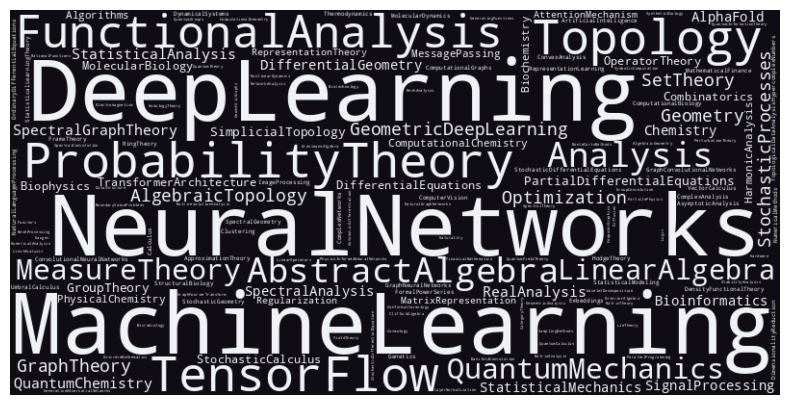

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color=(16, 12, 20), min_font_size=4,
                      font_step=1, max_words=200, max_font_size=100, relative_scaling=0,
                      random_state=1).generate_from_frequencies(tagmultiset)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: (240,243,246)), interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")